<a href="https://colab.research.google.com/github/adeekodaniel/DataScienceProj/blob/main/Rough-work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the necessary packages for the project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


I uploaded the dataset to my github account and used the link from github

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/adeekodaniel/DataScienceProj/main/adverts.csv')

Used .head methid to see the dataset

In [3]:
df.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


Doing a descriptive statistics on the dataset to better understand the dataframe 

In [4]:
df.shape

(402005, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


After observing the different data types of the different columns, we observe that year_of_registration data type as a float isn't correct, as year should be integer data type. 


In [6]:
df.describe()

,public_reference,mileage,year_of_registration,price
count,4.020050e+05,401878.000000,368694.000000,4.020050e+05
mean,2.020071e+14,37743.595656,2015.006206,1.734197e+04
std,1.691662e+10,34831.724018,7.962667,4.643746e+04
min,2.013072e+14,0.000000,999.000000,1.200000e+02
25%,2.020090e+14,10481.000000,2013.000000,7.495000e+03
50%,2.020093e+14,28629.500000,2016.000000,1.260000e+04
75%,2.020102e+14,56875.750000,2018.000000,2.000000e+04
max,2.020110e+14,999999.000000,2020.000000,9.999999e+06


Looking at the year_of_registration column, the min value of 999.9 isn't a correct year value - further query of the year of reg column will be needed.
We can check unique values here as digit expected here should be 4 digits in 'yyyy' format.

In [7]:
df['year_of_registration'].unique()

array([  nan, 2011., 2017., 2016., 2015., 2013., 2008., 2019., 2010.,
       2012., 2018., 2009., 1984., 2014., 2003., 2006., 2020., 2005.,
       2000., 2002., 2007., 2004., 1991., 2001., 1986., 1998., 1990.,
       1993., 1987., 1994., 1999., 1970., 1988., 1995., 1997., 1969.,
       1992., 1989., 1996., 1976., 1983., 1980., 1973., 1962., 1967.,
       1972., 1982., 1968., 1979., 1964., 1933., 1981., 1985., 1978.,
       1971., 1974., 1966., 1977., 1961., 1965., 1007., 1957., 1515.,
       1963., 1063., 1954., 1975., 1955., 1009., 1016., 1960., 1956.,
       1959., 1909., 1934., 1958., 1010., 1950., 1008., 1018.,  999.,
       1017., 1952., 1006., 1015.])

In [8]:
year_nan = df.loc[df['year_of_registration'].isna()]
year_nan.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
17,201911043995897,5.0,NaN,NaN,Nissan,X-Trail,NEW,NaN,27595,SUV,False,Diesel
19,202008272998331,0.0,NaN,White,Volkswagen,T-Cross,NEW,NaN,25000,SUV,False,Petrol
37,202001306737473,0.0,NaN,White,Fiat,Panda,NEW,NaN,13999,Hatchback,False,Petrol
44,202003178531910,0.0,NaN,NaN,Honda,Civic,NEW,NaN,19495,Hatchback,False,Petrol


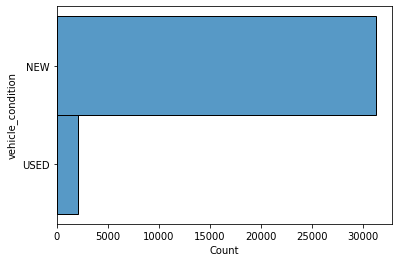

In [9]:
sns.histplot(data=year_nan, y='vehicle_condition')

The histogram showing the distribution of vehicle condition New/Old in NaN year value shows that not all vehicles with NaN year value are New. As some Old vehicle are also represented. We can assume that the vehicles whose registration code are all NaN  

Converting the 'year_of_registration' data type from float to integer with nan value will cause our code to break, hence we need to deal with the nan value. And in order to deal with the nan value we have to see how this feature relate with others in the table. 


In [10]:
df['year_of_registration'].value_counts()

2017.0    68790
2016.0    43483
2019.0    39236
2018.0    38300
2015.0    29019
          ...  
1010.0        1
1934.0        1
1016.0        1
1063.0        1
1015.0        1
Name: year_of_registration, Length: 84, dtype: int64

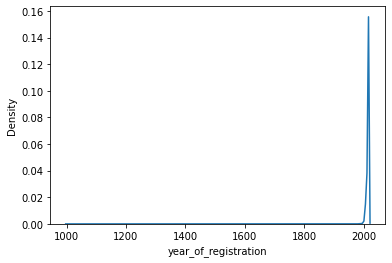

In [11]:
sns.kdeplot(data=df, x="year_of_registration")

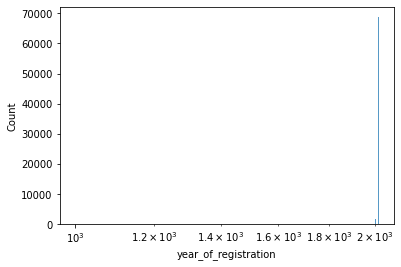

In [12]:
sns.histplot(data=df, x="year_of_registration", log_scale=True)

From the KDE distribution diagram we can see that year of registration ranging from 999 to less than 2000, where we can see more activities. We will subset the years in to 2 groups; nmaely less than 1900s and greater than 1900s. 


In [13]:
year_less_than_2000 = df[df['year_of_registration'] < 2000]

In [14]:
year_less_than_2000.shape

(2084, 12)

Vehicles with year of registration less than 2000 can be dropped as they are not of high importance to the dataset considering they are just 2084 rows.

In [15]:
year_greater_than_2000 = df[df['year_of_registration'] > 2000]
year_greater_than_2000.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel
5,202009304412074,16000.0,17,Blue,Audi,S5,USED,2017.0,29000,Convertible,False,Petrol


Now we will visualize the dataframe of year greater 2000 to better see the distribution.

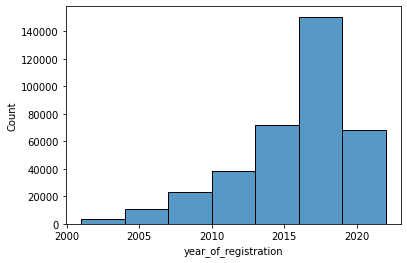

In [16]:
sns.histplot(data=year_greater_than_2000, x="year_of_registration", binwidth=3)

From earlier inspection of the column year of registration, we noticed that some rows are filled with NaN, we have to see the correlation with other columns in the table.


In [17]:
year_greater_than_2000['year_of_registration'].unique()

array([2011., 2017., 2016., 2015., 2013., 2008., 2019., 2010., 2012.,
       2018., 2009., 2014., 2003., 2006., 2020., 2005., 2002., 2007.,
       2004., 2001.])